In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# class Cleaner():
#     def __init__(self, data_file):
#         self.data_file=data_file
#         self.df=None
        
#     def load_data(self, data_file=''):
#         ret_val = False
        
#         #If a new file is passed, use that one
#         #Otherwise, use the original
#         if data_file == '':
#             data_file = self.data_file
#         try:
#             self.df = pd.read_csv(data_file)
#             ret_val = True
#         except Exception as e:
#             print(e)
            
#         return ret_val
        
# if __name__ == '__main__':
    
#     data_file = 'kc_house_data.csv'

#     HS = Cleaner(data_file)
#     HS.load_data()

#     row_max = len(HouseSales.df.index)
#     print(row_max)

In [67]:
data_file = 'kc_house_data.csv'
def load_and_clean(data_file):
    ret_val = None
    try:
        data = pd.read_csv(data_file)
        ret_val = data
    except Exception as e:
        print(e)
    
#     pd.to_datetime(data.date)
#     print(data.date.head())
    return ret_val

df = load_and_clean(data_file)


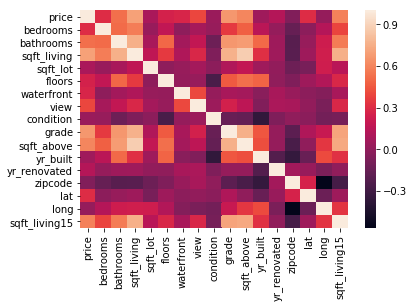

In [73]:
corr = df.iloc[slice(None),2:-1].corr()
sns.heatmap(corr)

In [60]:
class HouseDataInspector():
    def __init__(self, data_file):
        self.data_file = data_file
        self.data = pd.read_csv(data_file)
        self.bins = 10
        self.are_hidden = False
    
    def show_histogram(self, col_name):
        x = None
        
        if self.are_hidden:
            outlier_count = 0
            (col_min, col_max) = self.get_tails(col_name)
            interval = (col_max - col_min)//3
            (new_min, new_max) = col_min + interval, col_max - interval 
            print(col_min, col_max)
            print(new_min, new_max)
            x = self.data.loc[(self.data[col_name] > new_min) | (self.data[col_name] > new_max), col_name]
        else:
            x = self.data[col_name]
        
        num_bins = 10
        plt.hist(x, num_bins)
        plt.title('Kings County House Data')
        plt.xlabel(col_name)
        plt.show()
        
    def get_tails(self, col_name):
        return ((self.data[col_name].min(), self.data[col_name].max()))
    
    def has_nans(self, col_name):
        return sum(pd.isna(self.data[col_name]))
    
    def hide_outliers(self, my_bool):
        self.are_hidden = my_bool
        
        
        
        
KC = HouseDataInspector(data_file)


Which column? view


/Users/davidhaase/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/davidhaase/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


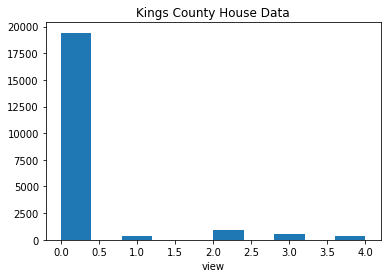

(0.0, 4.0)
view (63)


In [61]:
#Data Inspector
column = input('Which column? ')
if column in KC.data.columns:
    KC.show_histogram(column)
    print(KC.get_tails(column))
    nan_count = KC.has_nans(column)
    if nan_count:
        print(f'{column} ({nan_count})')
    else:
        print(f'{column} no NaNs.')
else:
    print(f'{column} not found.')
    print(df.columns)